In [1]:
library(tidyverse) 
library(reshape2)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleepday <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_logs <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [3]:
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
head(daily_calories)

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


In [5]:
head(daily_steps)

,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


In [6]:
summary(daily_steps)

       Id            ActivityDay          StepTotal    
 Min.   :1.504e+09   Length:940         Min.   :    0  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790  
 Median :4.445e+09   Mode  :character   Median : 7406  
 Mean   :4.855e+09                      Mean   : 7638  
 3rd Qu.:6.962e+09                      3rd Qu.:10727  
 Max.   :8.878e+09                      Max.   :36019  

In [7]:
colnames(sleepday)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [8]:
colnames(weight_logs)

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

In [9]:
colnames(daily_intensities
        )

[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

In [10]:
summary(daily_activity)

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

In [11]:
da1 <- daily_activity %>%
    select(Id, ActivityDate, Calories)
head(da1)

,Id,ActivityDate,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


In [12]:
summary(da1)

       Id            ActivityDate          Calories   
 Min.   :1.504e+09   Length:940         Min.   :   0  
 1st Qu.:2.320e+09   Class :character   1st Qu.:1828  
 Median :4.445e+09   Mode  :character   Median :2134  
 Mean   :4.855e+09                      Mean   :2304  
 3rd Qu.:6.962e+09                      3rd Qu.:2793  
 Max.   :8.878e+09                      Max.   :4900  

In [13]:
all.equal(da1, daily_calories)

[1] "Names: 1 string mismatch"

In [14]:
da2 <- daily_activity %>%
  select(Id, ActivityDate, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, SedentaryActiveDistance, LightActiveDistance, ModeratelyActiveDistance, VeryActiveDistance)

head(da2)

,Id,ActivityDate,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


In [15]:
summary(da2)

       Id            ActivityDate       SedentaryMinutes LightlyActiveMinutes
 Min.   :1.504e+09   Length:940         Min.   :   0.0   Min.   :  0.0       
 1st Qu.:2.320e+09   Class :character   1st Qu.: 729.8   1st Qu.:127.0       
 Median :4.445e+09   Mode  :character   Median :1057.5   Median :199.0       
 Mean   :4.855e+09                      Mean   : 991.2   Mean   :192.8       
 3rd Qu.:6.962e+09                      3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :8.878e+09                      Max.   :1440.0   Max.   :518.0       
 FairlyActiveMinutes VeryActiveMinutes SedentaryActiveDistance
 Min.   :  0.00      Min.   :  0.00    Min.   :0.000000       
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:0.000000       
 Median :  6.00      Median :  4.00    Median :0.000000       
 Mean   : 13.56      Mean   : 21.16    Mean   :0.001606       
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:0.000000       
 Max.   :143.00      Max.   :210.00    Max.   :0.110000       
 LightActiveD

In [16]:
all.equal(da2, daily_intensities)

[1] "Names: 1 string mismatch"

In [17]:
head(daily_steps)
colnames(daily_steps)

,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


[1] "Id"          "ActivityDay" "StepTotal"

In [18]:
colnames(daily_activity)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [19]:
a <- data.frame(daily_activity$'TotalSteps')
b <- data.frame(daily_steps$'StepTotal')

In [20]:
all.equal(a,b)

[1] "Names: 1 string mismatch"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



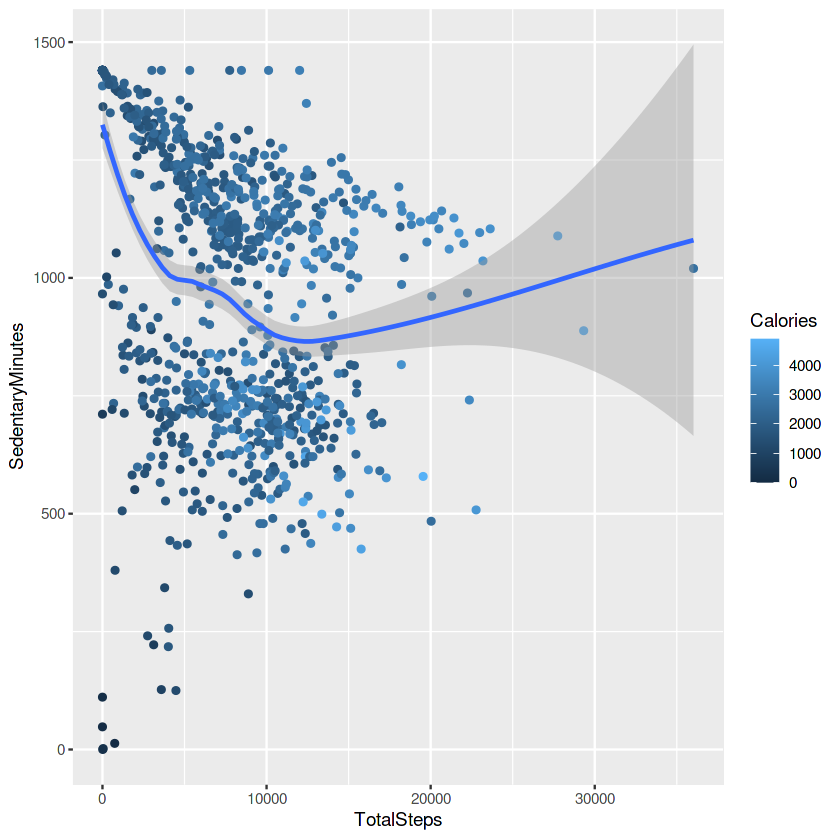

In [21]:
#ggplot2.barplot(data=daily_activity, xName = "TotalSteps", yName = "SedentaryMinutes",  groupName="Calories", brewerPalette="Blues")
ggplot(data=daily_activity, aes(x=TotalSteps, y=SedentaryMinutes, color = Calories)) + geom_point() + geom_smooth()

In [22]:
head(sleepday)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


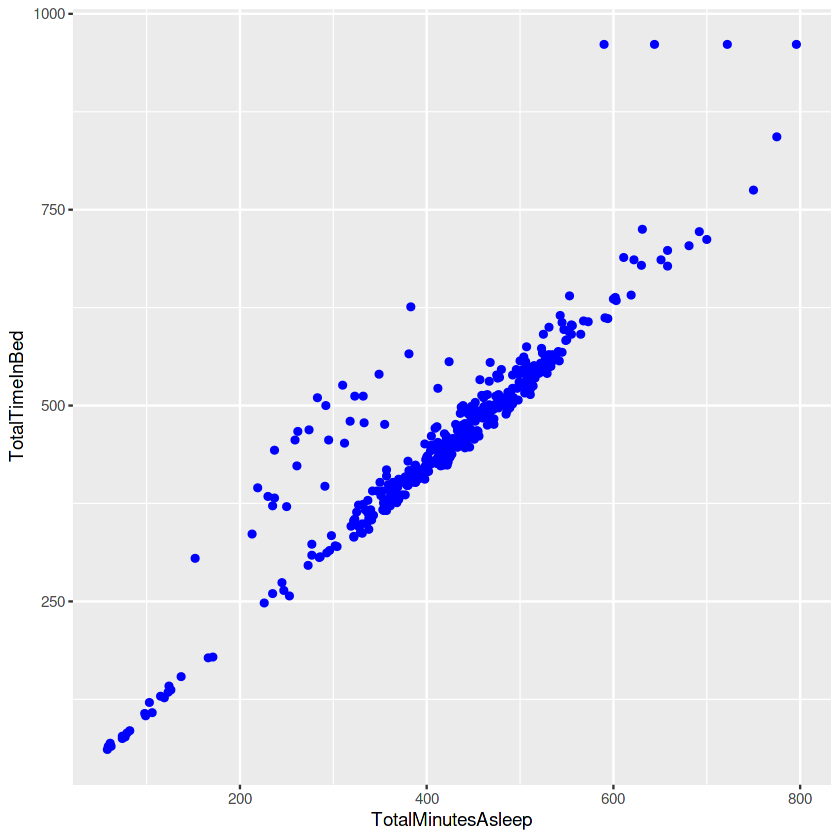

In [23]:
ggplot(sleepday, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point( color = "blue")

In [24]:
ds1 <- merge(sleepday, daily_activity, by="Id")
ds2 <- merge(weight_logs, daily_activity, by = 'Id')

In [25]:
summary(ds1)

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:12441       Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :432.0     
 Mean   :5.027e+09                      Mean   :1.121     Mean   :419.4     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:492.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed  ActivityDate         TotalSteps    TotalDistance   
 Min.   : 61.0   Length:12441       Min.   :    0   Min.   : 0.000  
 1st Qu.:402.0   Class :character   1st Qu.: 4660   1st Qu.: 3.180  
 Median :463.0   Mode  :character   Median : 8596   Median : 6.120  
 Mean   :458.4                      Mean   : 8117   Mean   : 5.735  
 3rd Qu.:526.0                      3rd Qu.:11317   3rd Qu.: 7.920  
 Max.   :961.0                      Max.   :229

In [26]:
head(ds1)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/6/2016,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/1/2016,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/30/2016,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947
5,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
6,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797


In [27]:
n_distinct(ds1$Id)

[1] 24

In [28]:
n_distinct(daily_activity$Id)
n_distinct(sleepday$Id)
n_distinct(weight_logs$Id)

[1] 33

[1] 24

[1] 8

In [29]:
df1 <- unique(weight_logs$Id)
df1

[1] 1503960366 1927972279 2873212765 4319703577 4558609924 5577150313 6962181067
[8] 8877689391

In [30]:
head(ds2)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,ActivityDate,TotalSteps,⋯,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,4/16/2016,12669,⋯,0,2.71,0.41,5.04,0,36,10,221,773,1863
2,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,4/18/2016,13019,⋯,0,3.25,0.64,4.71,0,42,16,233,1149,1921
3,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,4/15/2016,9762,⋯,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,5/8/2016,10060,⋯,0,3.53,0.32,2.73,0,44,8,203,574,1740
5,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,4/17/2016,9705,⋯,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,4/19/2016,15506,⋯,0,3.53,1.32,5.03,0,50,31,264,775,2035


In [31]:
n_distinct(ds2$Id)
unique(ds2$Id)

[1] 8

[1] 1503960366 1927972279 2873212765 4319703577 4558609924 5577150313 6962181067
[8] 8877689391

In [32]:
#ds3 <- ds2 %>% 
#        filter(Id %in% c('1503960366','1927972279', '4319703577', '4558609924', '5577150313', '6962181067'))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



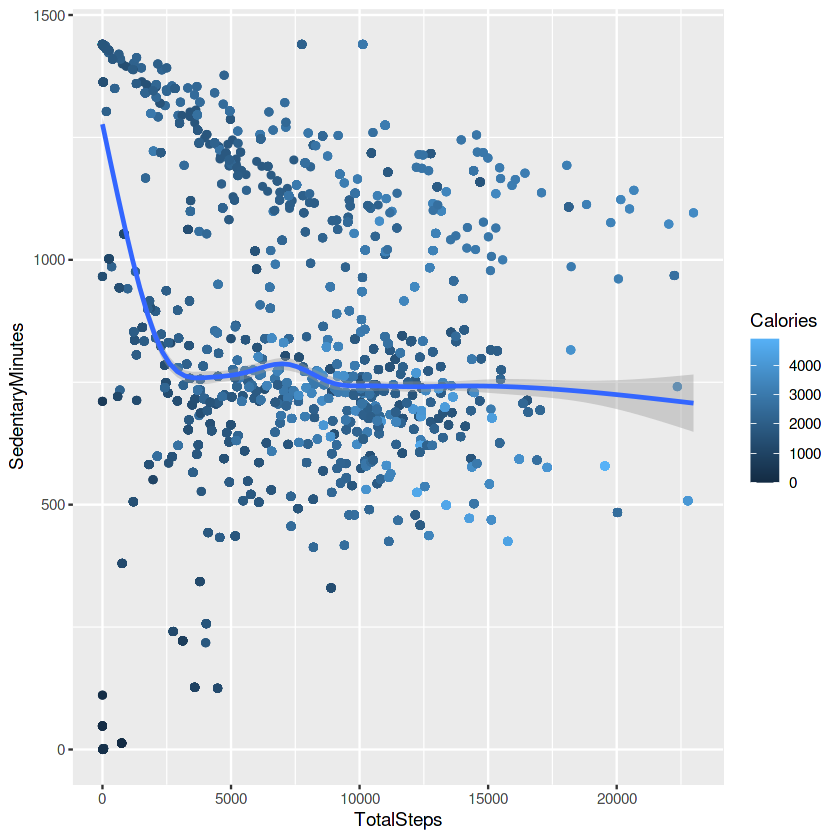

In [33]:
ggplot(data=ds1, aes(x=TotalSteps, y=SedentaryMinutes, color = Calories)) + geom_point() + geom_smooth()
#ppl who took sleep data into consideration 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



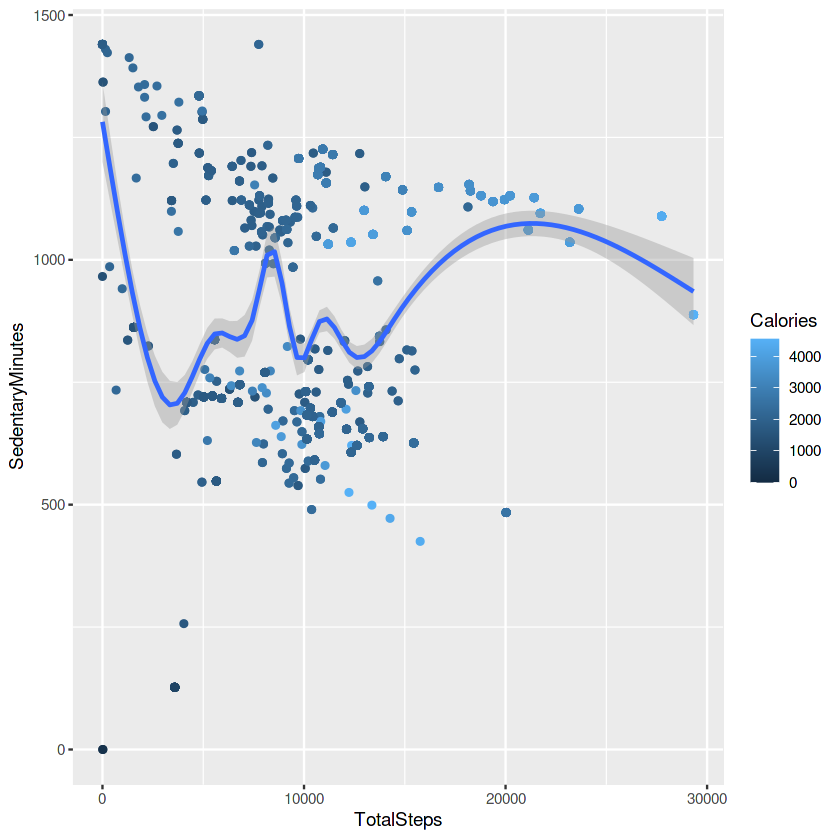

In [34]:
ggplot(data=ds2, aes(x=TotalSteps, y=SedentaryMinutes, color = Calories)) + geom_point() + geom_smooth()
#ppl who took wieght logs 

In [35]:
ds3 <- merge(ds1, weight_logs, by = 'Id')

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



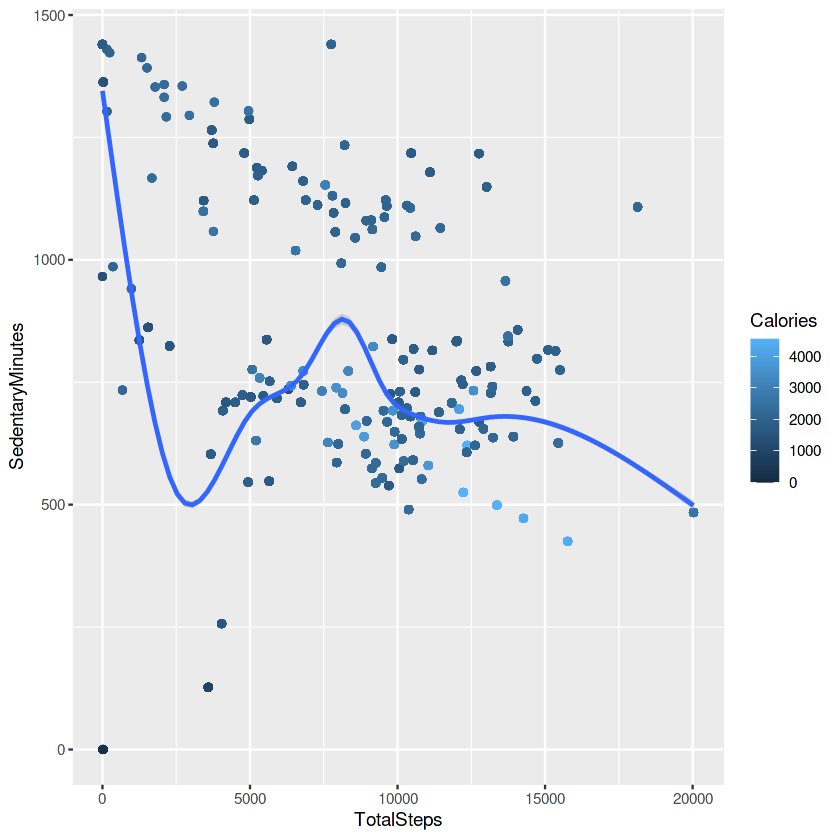

In [36]:
ggplot(data=ds3, aes(x=TotalSteps, y=SedentaryMinutes, color = Calories)) + geom_point() + geom_smooth()
#ppl who took both sleep and weight logs